In [ ]:
#This code calculates MCDA of the block groups within the Santa Clarita Valley.

In [1]:
#Importing packages and settings.
import os, math
import geopandas as gpd
import pandas as pd
import fiona
import numpy as np

In [2]:
#Displays the current working directory.
os.getcwd()

'C:\\Users\\sec22394'

In [3]:
#Changes the current working directory.
os.chdir(r'C:\Users\sec22394\Swany_408E\Geopandas_1')
os.getcwd()

'C:\\Users\\sec22394\\Swany_408E\\Geopandas_1'

In [4]:
#Displays a digital table of our target layer in the geodatabase.
gdf = gpd.read_file('SCV_Data.gdb', driver = 'OpenFileGDB' , layer = 'SCV_BG')
gdf.head(3)

,GEOID,Population,Education,Income,Language,Poverty,Unemployment,Ownership,Shape_Length,Shape_Area,geometry
0,060379200341,2545.0,9.400705,103594.0,3.165468,3.279336,2.138643,97.697842,0.118751,0.000592,"MULTIPOLYGON (((-118.47754 34.43641, -118.4775..."
1,060379203141,1826.0,1.762821,94375.0,1.130856,7.667032,6.012951,62.520194,0.062910,0.000134,"MULTIPOLYGON (((-118.53987 34.40437, -118.5392..."
2,060379201071,6295.0,0.222655,180500.0,5.322967,3.367752,4.179104,83.433014,0.239177,0.001119,"MULTIPOLYGON (((-118.61346 34.44956, -118.6134..."


In [5]:
#Displays the columns of our geodata file (gdf).
gdf.columns

Index(['GEOID', 'Population', 'Education', 'Income', 'Language', 'Poverty',
       'Unemployment', 'Ownership', 'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object')

In [6]:
#Weights: Rank Sum Method
aCriteria = ['Education', 'Income', 'Language', 'Poverty', 'Unemployment', 'Ownership']
aRank = [4, 1, 5, 2, 3, 6]
#Calculates criteria weights.
Step_1_RS = [ len(aRank) - item + 1 for item in aRank]
W = [ round( item / sum(Step_1_RS) , 3)  for item in Step_1_RS ]
W

[0.143, 0.286, 0.095, 0.238, 0.19, 0.048]

In [25]:
#Standardizes the criteria.
maxCriteria = ['Education', 'Language', 'Poverty', 'Unemployment']
minCriteria = ['Income', 'Ownership']

ST_max = gdf[maxCriteria] / np.sqrt(np.power(gdf[maxCriteria], 2).sum())
# math.pow(gdf[maxCriteria]) will not work because it is a table!
ST_min = 1-(gdf[minCriteria] / np.sqrt(np.power(gdf[minCriteria], 2).sum()))
ST = pd.concat([ST_max, ST_min], axis='columns')
#Creates weighted sum for each GEOID.
gdf['WS'] = (ST[aCriteria] * W).sum(axis=1)
gdf.head(2)

,GEOID,Population,Education,Income,Language,Poverty,Unemployment,Ownership,Shape_Length,Shape_Area,geometry,WS
0,060379200341,2545.0,9.400705,103594.0,3.165468,3.279336,2.138643,97.697842,0.118751,0.000592,"MULTIPOLYGON (((-118.47754 34.43641, -118.4775...",0.324813
1,060379203141,1826.0,1.762821,94375.0,1.130856,7.667032,6.012951,62.520194,0.062910,0.000134,"MULTIPOLYGON (((-118.53987 34.40437, -118.5392...",0.340294


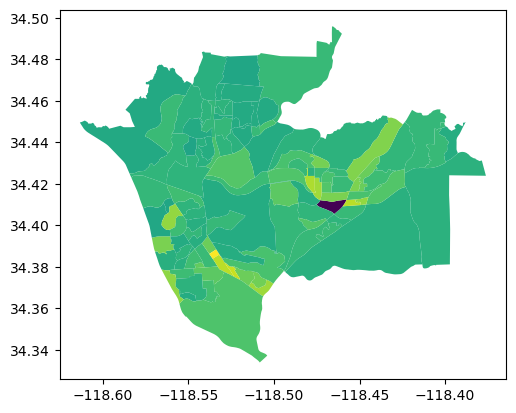

In [31]:
#Creates a map of the MCDA in Santa Clarita Valley.
gdf.plot(column = 'WS');

In [33]:
#Removes null in education data that skews the data.
gdf.query('Education.notnull()').shape

(108, 12)

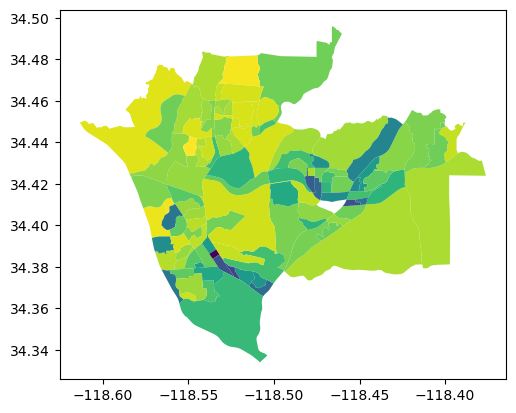

In [37]:
#Creates a digital map of the MCDA in Santa Clarita Valley.
gdf.query('Education.notnull()').plot(column = 'WS', cmap = 'viridis_r');

In [40]:
gdf.query('Education.notnull()').explore(column = 'WS', cmap = 'viridis_r', tiles = 'CartoDB positron')